In [1]:
import SimpleITK as sitk
import os
import torch
from torchvision import transforms
import numpy as np
import tifffile as tiff

import torch.nn as nn

import torch.optim as optim
from torch.utils.data import DataLoader
import math
import cv2
import matplotlib.pyplot as plt
import torch.nn.functional as F
from scipy.ndimage import map_coordinates
import pickle
from scipy import stats
import pandas as pd
from matplotlib.patches import Circle
from PIL import Image
import json
import statistics
import math
from math import pi
from scipy.spatial import cKDTree

In [2]:
%load_ext autoreload
%autoreload 2
from view_result_helper_functions import *

In [3]:
def load_positions(csv_path, header=False):
    # tissue_positions_list.csv has no header
    # cols: [barcode, in_tissue(0/1), row, col, x_px, y_px]
    if header:
        df = pd.read_csv(csv_path)
        # df.columns = ["barcode", "in_tissue", "row", "col", "x", "y"]
        df.columns = ["barcode", "in_tissue", "col", "row", "y", "x"]
    else:
        df = pd.read_csv(csv_path, header=None)
        # df.columns = ["barcode", "in_tissue", "row", "col", "x", "y"]
        df.columns = ["barcode", "in_tissue", "col", "row", "y", "x"]
        # df.columns = ["barcode", "x", "y"]

    return df

    

def plot_visium_spots(
    image_path,
    positions_csv,
    scalefactors_json=None,  # optional (for spot size)
    tissue_only=True,
    spot_edgecolor="k",
    spot_facecolor="none",
    spot_alpha=0.7,
    linewidth=0.6,
    header= False,
    half = False
):
    # 1) load image
    # img = np.array(Image.open(image_path))
    img =tiff.imread(image_path)
    H, W = img.shape[:2]

    # 2) load positions
    pos = load_positions(positions_csv, header)
    # print(pos)
    if tissue_only:
        pos = pos[pos["in_tissue"] == 1].copy()

    # 3) spot diameter (optional but nice)
    # If you’re plotting hires image, use 'spot_diameter_fullres'
    # For lowres, use 'spot_diameter_lowres'.
    # If scalefactors not provided, we’ll use a small visually sensible radius.
    radius = 10
    if scalefactors_json is not None:
        with open(scalefactors_json, "r") as f:
            sf = json.load(f)
        # try hires first, else lowres, else fallback
        d = sf.get("spot_diameter_fullres", sf.get("spot_diameter_lowres", None))
        if d is not None:
            if half:
                radius = float(d) / 4.0
            else:
                radius = float(d) / 2.0
    print(radius)

    # 4) draw
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img, cmap=None if img.ndim == 3 else "gray")
    ax.set_xlim([0, W])
    ax.set_ylim([H, 0])  # flip y so (0,0) is top-left like image coords
    ax.set_title("Visium spots on H&E")

    # Draw each spot as a circle (more faithful than scatter for real spot size)
    for _, r in pos.iterrows():
        circ = Circle(
            (r["x"], r["y"]),
            radius=radius,
            ec=spot_edgecolor,
            fc=spot_facecolor,
            lw=linewidth,
            alpha=spot_alpha,
        )
        ax.add_patch(circ)

    ax.set_axis_off()
    plt.tight_layout()
    plt.show()


In [4]:
path3 = '/extra/zhanglab0/INDV/leiy28/image_registration/simulation/human_breast_cancer_visium'
image1_path = '/extra/zhanglab0/INDV/leiy28/image_registration/ST_data/human_breast_cancer_visium/section_1/spatial/V1_Breast_Cancer_Block_A_Section_1_image.tif'
image2_path = '/extra/zhanglab0/INDV/leiy28/image_registration/ST_data/human_breast_cancer_visium/section_2/spatial/V1_Breast_Cancer_Block_A_Section_2_image.tif'

image_transformed_v3 = tiff.imread(f'{path3}/real_out4/preprocess_out/final_registered_with_global2.tif')
image_global_v3 = tiff.imread(f'{path3}/real_out4/preprocess_out/global_only.tif')

image_simulated = tiff.imread(image1_path)
image_orig = tiff.imread(image2_path)
deformation_field = tiff.imread(f'{path3}/real_out4/preprocess_out/deformation_field.tif')
# global_only.tif

deformation_field_global = tiff.imread(f'{path3}/real_out4/preprocess_out/global_deformation_field.tif')
# global_deformation_field.tif
image_global = tiff.imread(f'{path3}/real_out4/preprocess_out/global_only.tif')


image_simulated2 = cv2.resize(np.array(image_simulated), None, fx=0.5, fy=0.5)
image_orig2 = cv2.resize(np.array(image_orig), None, fx=0.5, fy=0.5)

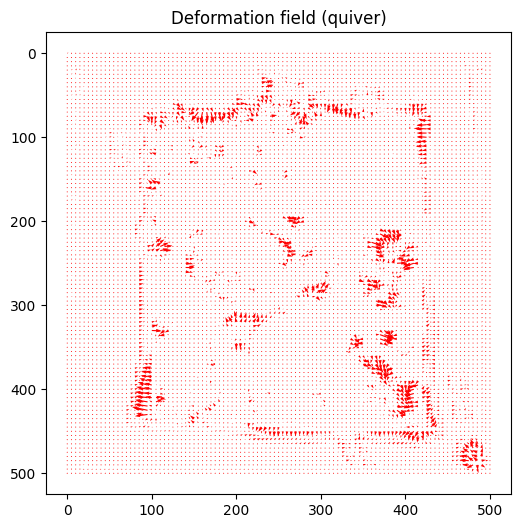

In [5]:
reshaped = np.transpose(deformation_field_global, (1, 2, 0))
# show_deformation_quiver(reshaped[375:666, 666:850], step=5)
187., 333., 333., 425.
show_deformation_quiver(reshaped, step=5)

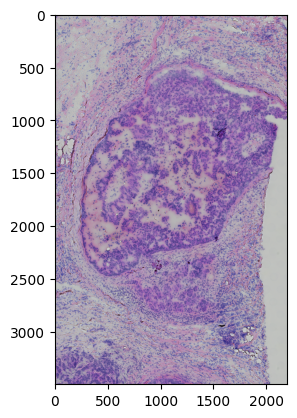

In [6]:
plt.imshow(image_orig2[4500:8000,8000:10200])

In [7]:
plt.imshow(image_transformed_v2[4500:8000,8000:10200], cmap = 'gray')

NameError: name 'image_transformed_v2' is not defined